In [1]:
from matplotlib.backends.backend_agg import RendererAgg
import streamlit as st
import numpy as np
import pandas as pd
import xmltodict
from pandas import json_normalize
import urllib.request
import seaborn as sns
import matplotlib
from matplotlib.figure import Figure
from PIL import Image
import gender_guesser.detector as gender
from streamlit_lottie import st_lottie
import requests
import glob
import os
import matplotlib.pyplot as plt

In [2]:
# this function imports all csv's from the data_directory into their own correctly named pandas dataframes
def import_data_into_dataframes(data_directory):
    file_list = glob.glob(data_directory + '/*.csv')
    print(file_list)
    df_list = []
    for file in file_list:
        df_list.append(pd.read_csv(file))
    return df_list
    
    
# this function gets all columns from each dataframe and prints them with a blank line between each
def print_all_columns(df_list):
    for df in df_list:
        print(df.columns)
        print()
            
def merge_dataframes(df_list):
    df = pd.merge(df_list[0], df_list[1], on='name')
    # drop rows that have empty columns and duplicates
    df = df.dropna(axis=0, how='any')
    df = df.drop_duplicates(subset=['name'], keep='first')
    # drop the columns: 'state_code', 'state','degree_length','rank'
    df = df.drop(columns=['state_code', 'state','degree_length','rank'])
    return df
    

def highlight_above_avg(s):
    s_avg = s >= s.quantile(.50)
    return ['background: lightgreen' if cell else '' for cell in s_avg]

def highlight_below_avg(s):
    s_avg = s < s.quantile(.10)
    return ['background: red' if cell else '' for cell in s_avg]

def highlight_top(s):   
    s_avg = s > s.quantile(0.90)
    return ['color: blue' if cell else '' for cell in s_avg]

In [3]:
directory = os.getcwd() + "/Data/"
df_list = import_data_into_dataframes(directory)

['/projects/65f8ce7b-746e-46c7-a845-426a82b8c18b/streamlit_demo/streamlit_goodreads_app/Data/salary_potential.csv', '/projects/65f8ce7b-746e-46c7-a845-426a82b8c18b/streamlit_demo/streamlit_goodreads_app/Data/tuition_cost.csv']


In [4]:
df_list[0].head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3


In [5]:
print_all_columns(df_list)

Index(['rank', 'name', 'state_name', 'early_career_pay', 'mid_career_pay',
       'make_world_better_percent', 'stem_percent'],
      dtype='object')

Index(['name', 'state', 'state_code', 'type', 'degree_length',
       'room_and_board', 'in_state_tuition', 'in_state_total',
       'out_of_state_tuition', 'out_of_state_total'],
      dtype='object')



In [6]:
df = merge_dataframes(df_list)

In [15]:
df.tail(5)

,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,type,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
723,Wisconsin Lutheran College,Wisconsin,46200,82500,45.0,10,Private,10190.0,29725,39915,29725,39915
724,Viterbo University,Wisconsin,46800,81900,62.0,3,Private,9060.0,27970,37030,27970,37030
725,University of Wisconsin-Parkside,Wisconsin,46000,81400,47.0,17,Public,8026.0,7529,15555,15518,23544
726,University of Wisconsin-River Falls,Wisconsin,47100,81300,52.0,14,Public,6513.0,7862,14375,15435,21948
727,University of Wyoming,Wyoming,52400,98800,58.0,25,Public,10320.0,5400,15720,17490,27810


In [8]:
states = df.state_name.unique()
state_stats = pd.DataFrame(index=states, columns=['number of schools','average early_career_pay','average mid_career_pay','average make_world_better_percent', 'average stem_percent','average room_and_board',  'average in_state_tuition', 'average in_state_total','average out_of_state_tuition','average out_of_state_total'])
    # fill each of the state_stats columns using data from df
for state in states:
    state_stats.loc[state, 'number of schools'] = len(df[df.state_name == state])
    state_stats.loc[state, 'average early_career_pay'] = df[df.state_name == state]['early_career_pay'].mean()
    state_stats.loc[state, 'average mid_career_pay'] = df[df.state_name == state]['mid_career_pay'].mean()
    state_stats.loc[state, 'average make_world_better_percent'] = df[df.state_name == state]['make_world_better_percent'].mean()
    state_stats.loc[state, 'average stem_percent'] = df[df.state_name == state]['stem_percent'].mean()
    state_stats.loc[state, 'average room_and_board'] = df[df.state_name == state]['room_and_board'].mean()
    state_stats.loc[state, 'average in_state_tuition'] = df[df.state_name == state]['in_state_tuition'].mean()
    state_stats.loc[state, 'average in_state_total'] = df[df.state_name == state]['in_state_total'].mean()
    state_stats.loc[state, 'average out_of_state_tuition'] = df[df.state_name == state]['out_of_state_tuition'].mean()
    state_stats.loc[state, 'average out_of_state_total'] = df[df.state_name == state]['out_of_state_total'].mean()
state_stats.head()



,number of schools,average early_career_pay,average mid_career_pay,average make_world_better_percent,average stem_percent,average room_and_board,average in_state_tuition,average in_state_total,average out_of_state_tuition,average out_of_state_total
Alabama,20,44700.0,81295.0,60.5,14.3,9024.25,16600.45,25624.7,22834.9,31859.15
Alaska,3,55133.333333,97600.0,59.333333,12.0,9476.666667,12201.666667,21678.333333,22981.666667,32458.333333
Arizona,3,48966.666667,88166.666667,58.666667,11.666667,10177.333333,18512.0,28689.333333,31233.0,41410.333333
Arkansas,13,45138.461538,81130.769231,55.538462,14.923077,8449.615385,17888.615385,26338.230769,22145.0,30594.615385
California,13,67800.0,124876.923077,49.769231,30.615385,15498.307692,47656.538462,63154.846154,48387.615385,63885.923077


In [9]:
# convert all columns to numeric
state_stats = state_stats.apply(pd.to_numeric)
# make columns for four year average out of state and in state total
state_stats['four year average out of state total'] = state_stats['average out_of_state_total'] * 4
state_stats['four year average in state total'] = state_stats['average in_state_total'] * 4
# make column calculating how many years on average to repay four year average in and our of state based on average early career pay in index 0
state_stats['years to repay in state 4 year uni based on early career pay'] =  state_stats['four year average in state total'] / state_stats['average early_career_pay']
state_stats['years to repay out of state 4 year uni based on early career pay'] = state_stats['four year average out of state total'] / state_stats['average early_career_pay'] 
# make column calculating how many years on average to repay four year average in and our of state based on average mid career pay in index 0
state_stats['years to repay in state 4 year uni based on mid career pay'] =  state_stats['four year average in state total'] / state_stats['average mid_career_pay']
state_stats['years to repay out of state 4 year uni based on mid career pay'] = state_stats['four year average out of state total'] / state_stats['average mid_career_pay'] 
# move 'years to repay out of state 4 year uni based on early career pay' to the front of the dataframe
state_stats = state_stats.reindex(columns=['years to repay in state 4 year uni based on early career pay', 'years to repay out of state 4 year uni based on early career pay',
'years to repay in state 4 year uni based on mid career pay', 'years to repay out of state 4 year uni based on mid career pay',
 'number of schools', 'average early_career_pay', 'average mid_career_pay', 'average make_world_better_percent', 'average stem_percent',
  'average room_and_board',  'average in_state_tuition', 'average in_state_total',	'average out_of_state_tuition',
   'average out_of_state_total', 'four year average out of state total', 'four year average in state total'])


In [10]:
state_stats.style.apply(highlight_above_avg).apply(highlight_top).apply(highlight_below_avg)

,years to repay in state 4 year uni based on early career pay,years to repay out of state 4 year uni based on early career pay,years to repay in state 4 year uni based on mid career pay,years to repay out of state 4 year uni based on mid career pay,number of schools,average early_career_pay,average mid_career_pay,average make_world_better_percent,average stem_percent,average room_and_board,average in_state_tuition,average in_state_total,average out_of_state_tuition,average out_of_state_total,four year average out of state total,four year average in state total
Alabama,2.293038,2.850931,1.260825,1.567582,20,44700.000000,81295.000000,60.500000,14.300000,9024.250000,16600.450000,25624.700000,22834.900000,31859.150000,127436.600000,102498.800000
Alaska,1.572793,2.354897,0.888456,1.330260,3,55133.333333,97600.000000,59.333333,12.000000,9476.666667,12201.666667,21678.333333,22981.666667,32458.333333,129833.333333,86713.333333
Arizona,2.343581,3.382737,1.301595,1.878730,3,48966.666667,88166.666667,58.666667,11.666667,10177.333333,18512.000000,28689.333333,31233.000000,41410.333333,165641.333333,114757.333333
Arkansas,2.333995,2.711179,1.298557,1.508410,13,45138.461538,81130.769231,55.538462,14.923077,8449.615385,17888.615385,26338.230769,22145.000000,30594.615385,122378.461538,105352.923077
California,3.725950,3.769081,2.022947,2.046364,13,67800.000000,124876.923077,49.769231,30.615385,15498.307692,47656.538462,63154.846154,48387.615385,63885.923077,255543.692308,252619.384615
Colorado,2.551806,3.293956,1.418997,1.831688,12,52475.000000,94366.666667,54.166667,21.500000,11452.833333,22023.666667,33476.500000,31759.750000,43212.583333,172850.333333,133906.000000
Connecticut,3.562525,3.848692,1.966158,2.124093,17,55358.823529,100305.882353,50.000000,16.705882,13936.823529,35367.470588,49304.294118,39327.941176,53264.764706,213059.058824,197217.176471
Delaware,2.307306,2.900330,1.313491,1.651084,4,50025.000000,87875.000000,49.250000,14.750000,10792.250000,18063.500000,28855.750000,25480.000000,36272.250000,145089.000000,115423.000000
Florida,2.828153,3.403856,1.571099,1.890915,18,50250.000000,90455.555556,54.500000,14.388889,11407.111111,24121.555556,35528.666667,31353.833333,42760.944444,171043.777778,142114.666667
Georgia,2.665856,3.265684,1.492119,1.827852,22,48527.272727,86700.000000,52.863636,14.636364,11147.772727,21193.909091,32341.681818,28470.909091,39618.681818,158474.727273,129366.727273


In [11]:
# plot the relationship between 'average stem_percent' and 'average early_career_pay'
# use seaborn to plot a scatter plot of the data
def plot_stem_early_career(df):
    # create a scatter plot of 'average stem_percent' vs 'average early_career_pay'
    sns.scatterplot(x='average stem_percent', y='average early_career_pay', data=df)
    # add a title
    plt.title('Average STEM Percent vs Average Early Career Pay')
    # add a label to the y-axis
    plt.ylabel('Average Early Career Pay')
    # add a label to the x-axis
    plt.xlabel('Average STEM Percent')
    # add label with the index to each point
    for i, txt in enumerate(df.index):
        plt.annotate(txt, (df['average stem_percent'][i], df['average early_career_pay'][i]), rotation=15)
    # show the plot
    plt.show()

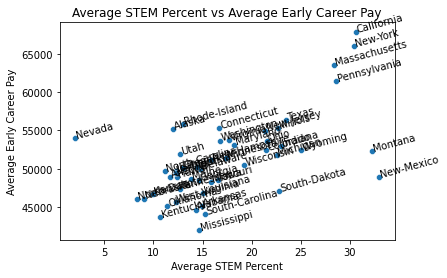

In [12]:
plot_stem_early_career(state_stats)

In [13]:
# plot similar to plot_stem_early_career but for 'four year average in state total' and 'average early_career_pay'
def plot_4instate_early_career(df):
    sns.scatterplot(x='four year average in state total', y='average early_career_pay', data=df)
    plt.title('Average In State Tuition vs Average Early Career Pay')
    plt.ylabel('Average Early Career Pay')
    plt.xlabel('Average In State Tuition')
    for i, txt in enumerate(df.index):
        plt.annotate(txt, (df['four year average in state total'][i], df['average early_career_pay'][i]), rotation=15)
    plt.show()


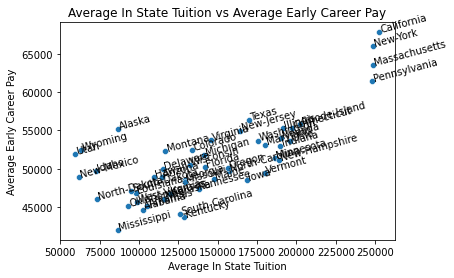

In [14]:
plot_4instate_early_career(state_stats)